<a href="https://colab.research.google.com/github/Karenpess/dsa/blob/main/varejo_dsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise Exploratória na área de Varejo

In [2]:
# Versão da linguagem python
from platform import python_version
print("A versão da linguagem Python usada neste notebook é ", python_version())

A versão da linguagem Python usada neste notebook é  3.10.12


In [27]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv('/content/dataset.csv')

In [11]:
# Visualizando as primeiras linhas do banco de dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Solicitando as dimensões do banco de dados
df_dsa.shape

(9700, 11)

In [7]:
# Verificando os nomes das variáveis
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando os tipos de cada variável
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [29]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando a presença de dados duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando a presença de valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

Pergunta 1.	Qual cidade com maior valor de venda de produtos da categoria office supplies?

In [12]:
# filtro da categoria desejada 'Office Supplies'
df_cat_os = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [13]:
# agrupamento por 'Cidade' e soma do 'Valor_Venda'
df_cat_os_total = df_cat_os.groupby('Cidade')['Valor_Venda'].sum()

In [14]:
# rank de 'Cidade' por 'Valor_Venda'
cid_maior_venda = df_cat_os_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cid_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [15]:
# conferindo o resultado
df_cat_os_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

Pergunta 2.	Qual o total de vendas por data do pedido? Demonstre o resultado através de um gráfico de barras.

In [16]:
# agrupamento por 'Data_Pedido' e soma do 'Valor_Venda'
df_dp = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
df_dp.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

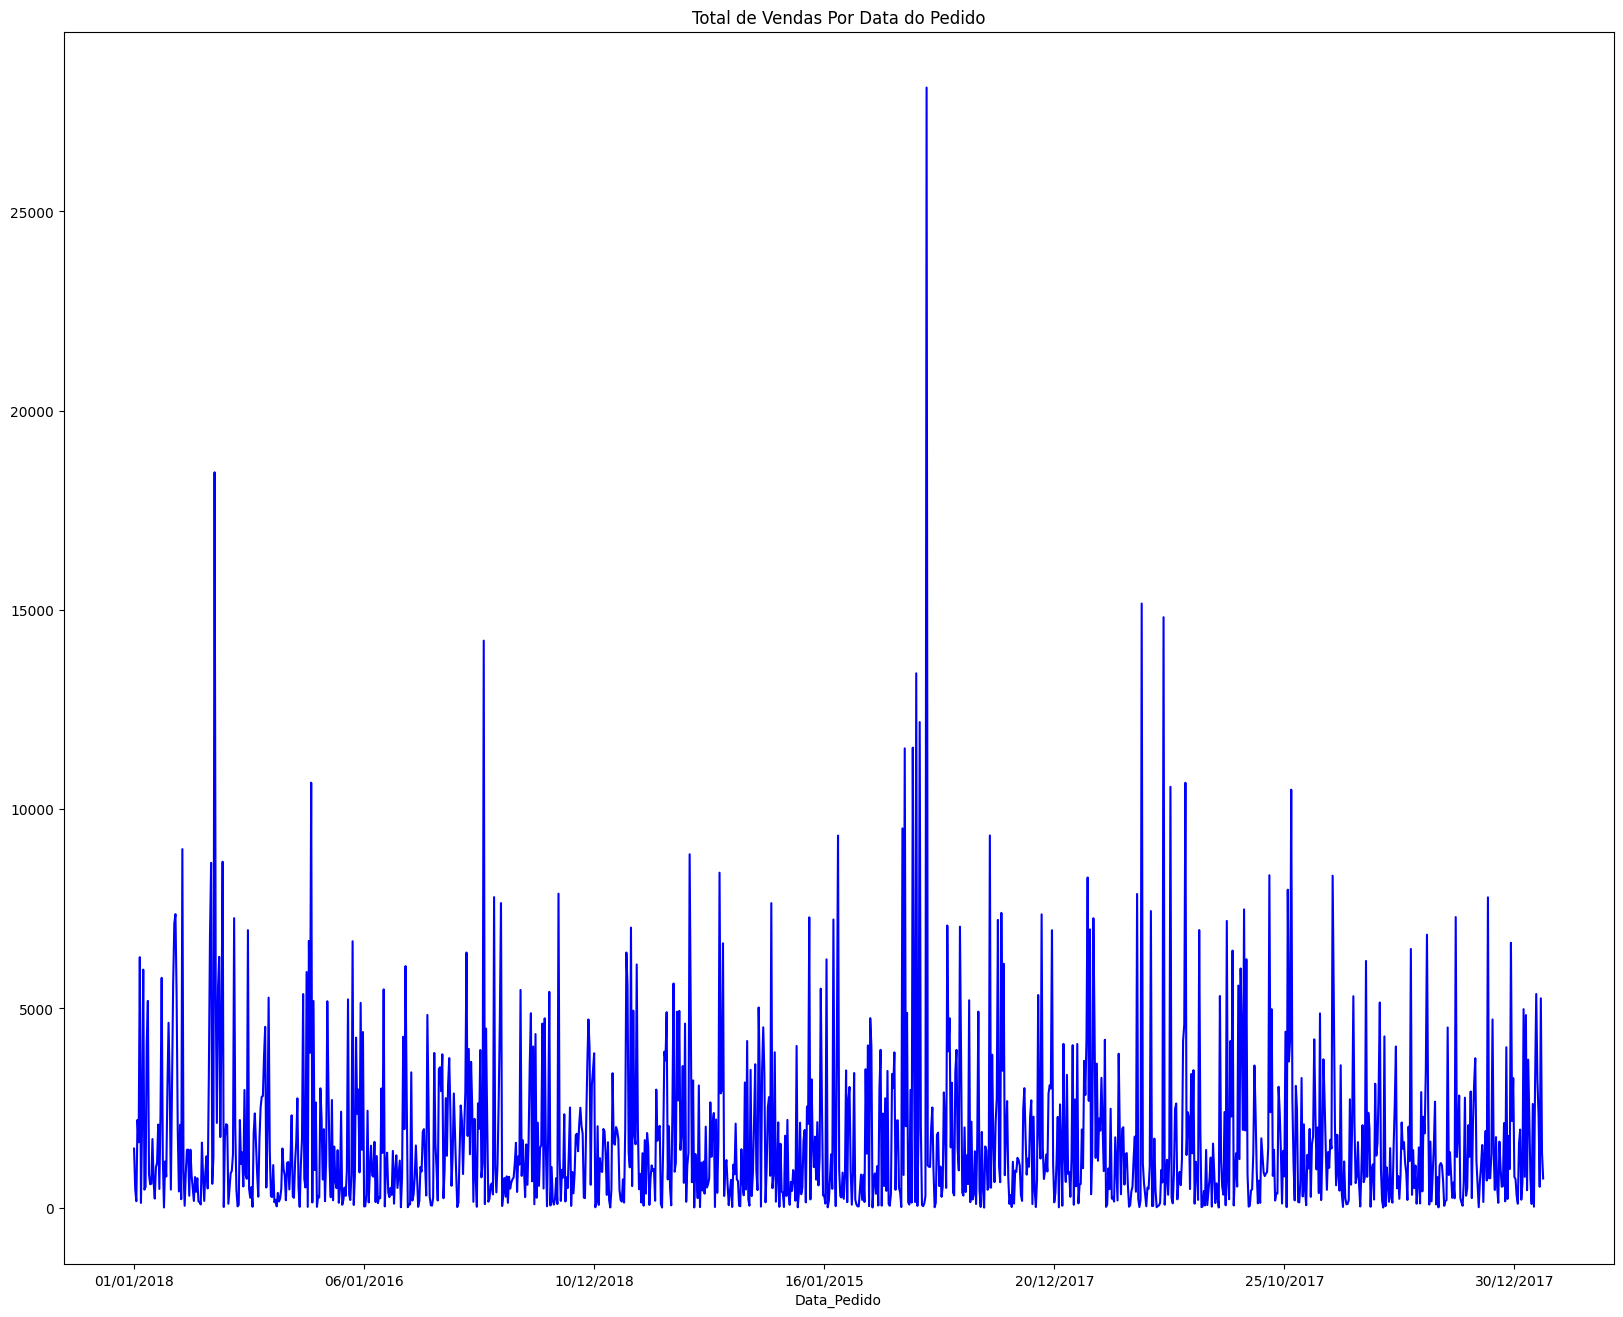

In [18]:
# Plot
plt.figure(figsize = (20, 16))
df_dp.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

Pergunta 3.	Qual o total de vendas por estado? Demonstre o resultado através de um gráfico de barras.

In [19]:
# agrupamento por 'Estado' e soma do 'Valor_Venda'
df_est = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

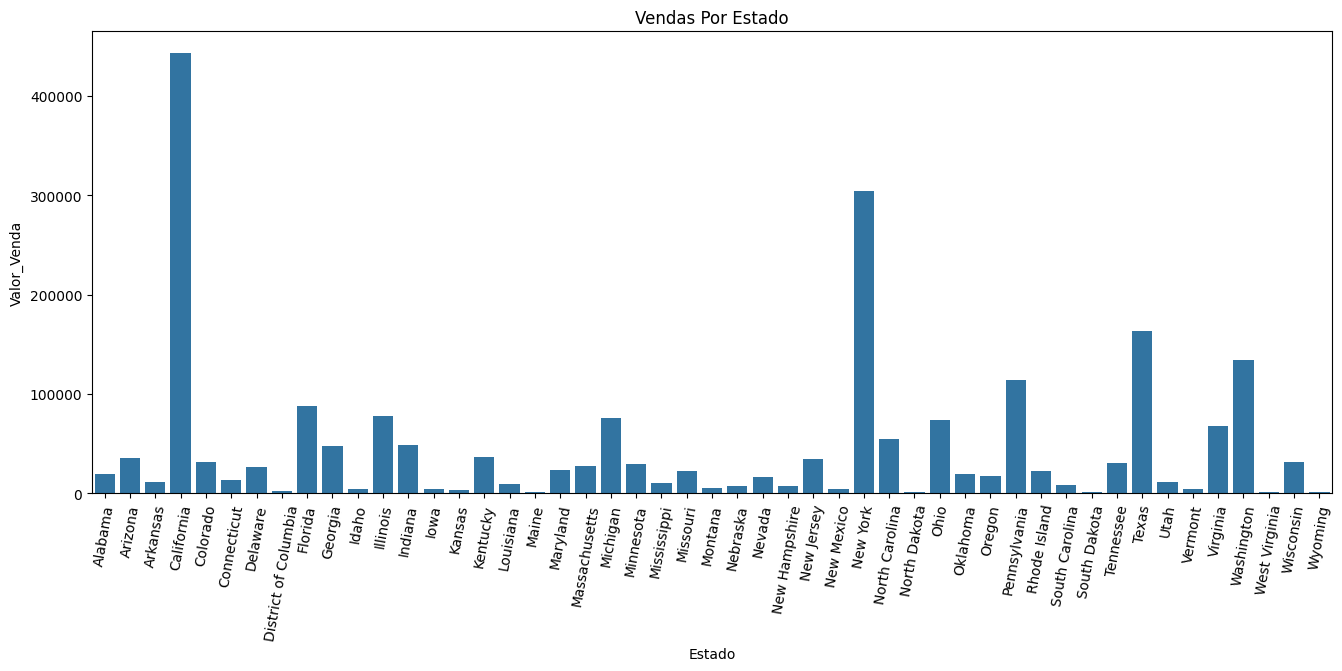

In [20]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_est,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

Pergunta 4.	Quais são as 10 cidades com maior total de vendas? Demonstre o resultado através de um gráfico de barras.

In [21]:
# agrupamento por 'Cidade' e soma do 'Valor_Venda'
df_cid = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

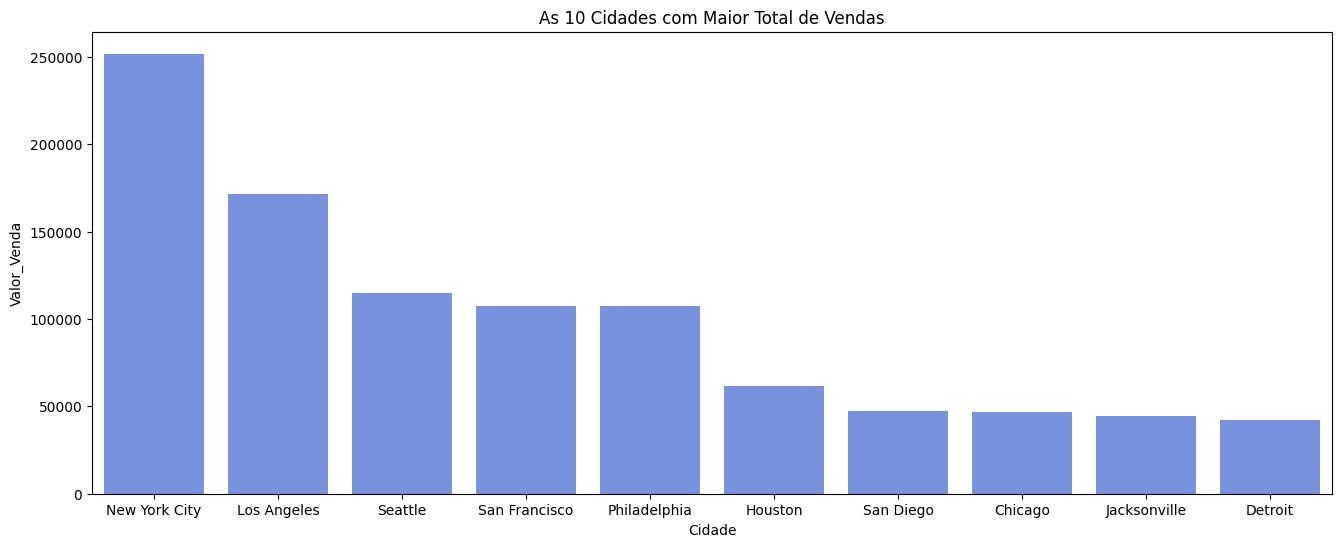

In [22]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_cid,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

Pergunta 5.	Qual segmento teve o maior total de vendas? Demonstre o resultado através de um gráfico de pizza.

In [23]:
# agrupamento por 'Segmento' e soma do 'Valor_Venda'
df_seg = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [24]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

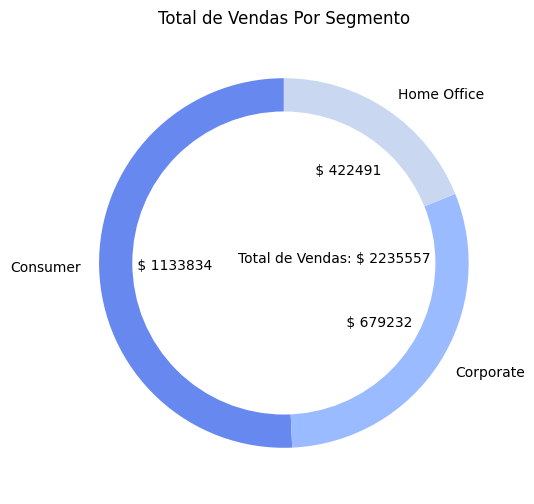

In [25]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_seg['Valor_Venda'],
        labels = df_seg['Segmento'],
        autopct = autopct_format(df_seg['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_seg['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

Pergunta 6.	Qual o total de vendas por segmento e por ano?

In [30]:
# Extrair o Ano da 'Data_Pedido'
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [56]:
# agrupamento por 'Segmento' e  'Ano' e soma do 'Valor_Venda'
df_ano_seg = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index()

In [33]:
df_ano_seg

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


Pergunta 7.	Simulação de diferentes faixas de desconto:

a.	Se o Valor_Venda for maior do que 1000 recebe 15% de desconto.

b.	Se o Valor_Venda for menor do que 1000 recebe 10% de desconto.

Quantas vendas receberiam 15% de desconto?


In [34]:
# Criar coluna Desconto com as regras de negocio
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [37]:
# Total por cada valor da variável
df_dsa['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [41]:
print('No total, 457 vendas receberiam desconto de 15%.')

No total, 457 vendas receberiam desconto de 15%.


Pergunta 8.	No cenário da simulação anterior, qual seria a média do valor de venda antes e depois do desconto?


In [44]:
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])

In [45]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [48]:
# Filtrando as vendas maiores que 1000, antes e depois do desconto
vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']
vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [49]:
# Calculando as médias das vendas antes e depois do desconto
media_antes_desconto = vendas_antes_desconto.mean()
media_depois_desconto = vendas_depois_desconto.mean()

In [53]:
# Comparando as médias das vendas antes e depois do desocnto
print("A média das vendas antes do desconto de 15% é", round(media_antes_desconto, 2), "enquanto a média depois do desconto de 15% é", round(media_depois_desconto, 2), '.')

A média das vendas antes do desconto de 15% é 2116.81 enquanto a média depois do desconto de 15% é 1799.29 .


Pergunta 9.	Qual a média de vendas por segmento, por ano e por mês? Demonstre o resultado através de um gráfico de linha.

In [59]:
# Extrair o Mes da 'Data_Pedido'
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

In [60]:
# Agrupando por Anos, Mes e Segmento
df_ano_mes_seg = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [61]:
df_ano_mes_seg

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [62]:
# Vamos extrair os níveis
anos = df_ano_mes_seg.index.get_level_values(0)
meses = df_ano_mes_seg.index.get_level_values(1)
segmentos = df_ano_mes_seg.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

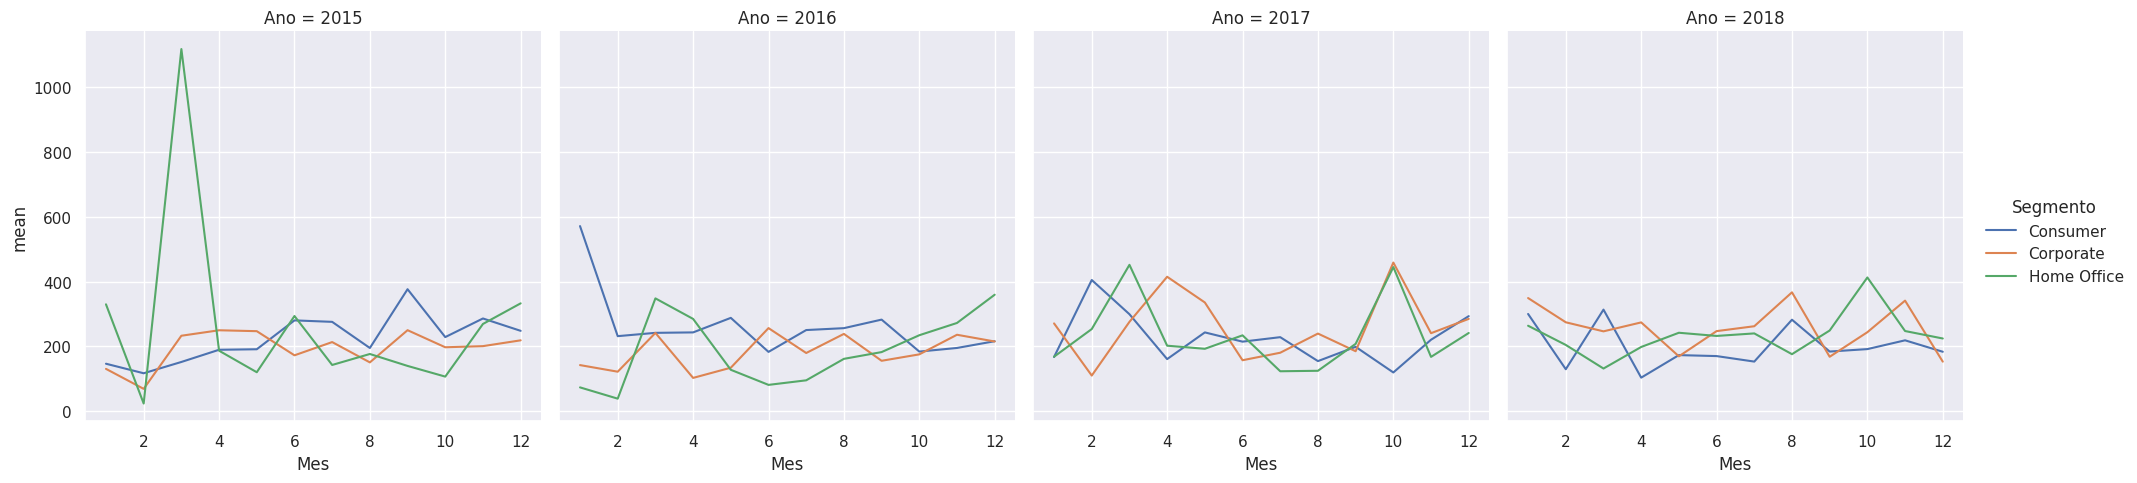

In [64]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_ano_mes_seg,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)
plt.show()

Pergunta 10.	Qual o total de vendas por categoria e subcategoria, considerando somente as top 12 subcategorias? Demonstre tudo através de um único gráfico.

In [69]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
top12_subcat = df_dsa.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

In [70]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
top12_subcat = top12_subcat[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

# Obs: Classificar o item acima por categoria é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [71]:
top12_subcat

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [72]:
# Criamos outro dataframe somente com os totais por categoria
top12_subcat_cat = top12_subcat.groupby('Categoria').sum(numeric_only = True).reset_index()

In [73]:
top12_subcat_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [74]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

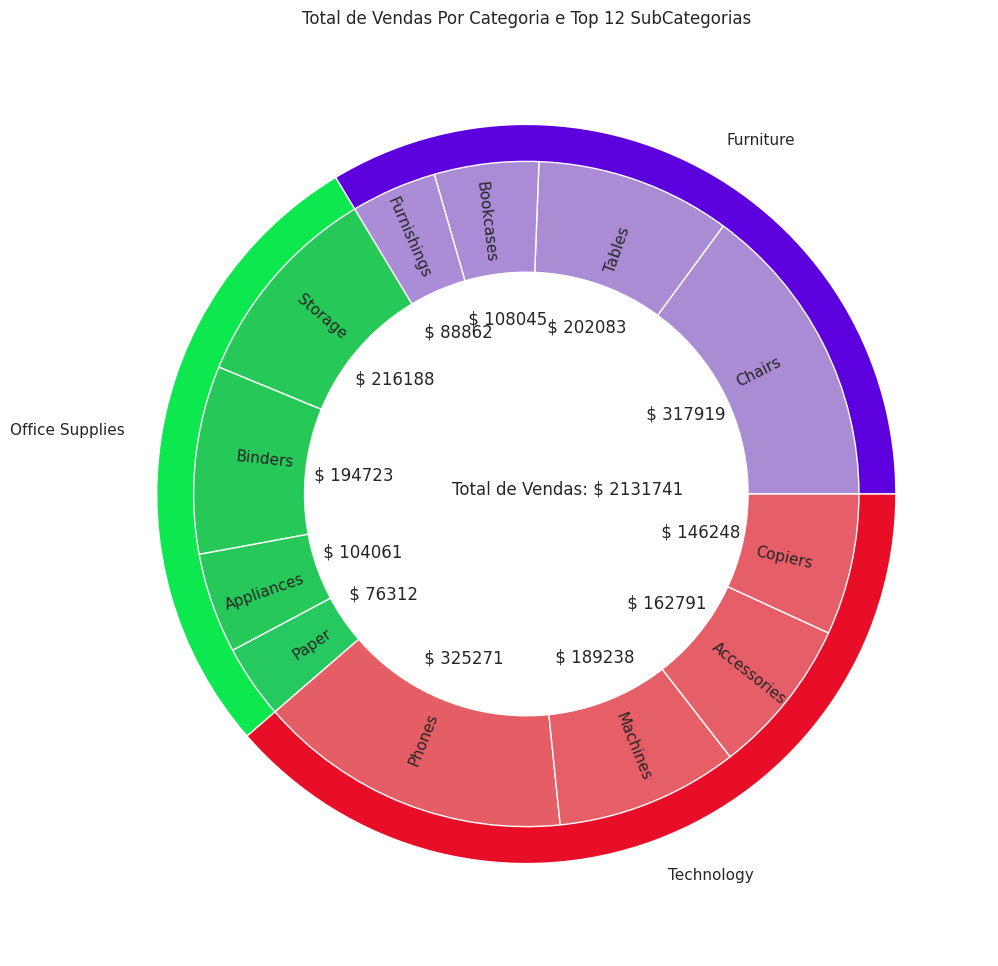

In [76]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(top12_subcat_cat['Valor_Venda'],
            radius = 1,
            labels = top12_subcat_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(top12_subcat['Valor_Venda'],
            radius = 0.9,
            labels = top12_subcat['SubCategoria'],
            autopct = autopct_format(top12_subcat['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(top12_subcat['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()